    Ben Christensen
    Math 402
    November 30, 2018

# Data Visualization

In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [58]:
#Store results of webscraping in a dataframe
no_report = [140, 151, 121, 188, 242, 245, 199, 146, 147, 154, 122]
found_summary = [0, 0, 0, 0, 0, 0, 0, 22, 63, 112, 79]
found_pdf = [46, 79, 75, 125, 95, 88, 33, 19, 0, 0, 1]
no_estimate = [160, 280, 130, 150, 119, 102, 114, 79, 70, 48, 57]
sessions = np.arange(105, 116)
d = {"No Report":pd.Series(no_report, sessions), 
     "Found in Summary":pd.Series(found_summary, sessions),
     "Found in PDF":pd.Series(found_pdf, sessions),
     "No Estimate Found in Report":pd.Series(no_estimate, sessions)}
descrip_df = pd.DataFrame(d)

In [59]:
descrip_df.head()

,Found in PDF,Found in Summary,No Estimate Found in Report,No Report
105,46,0,160,140
106,79,0,280,151
107,75,0,130,121
108,125,0,150,188
109,95,0,119,242


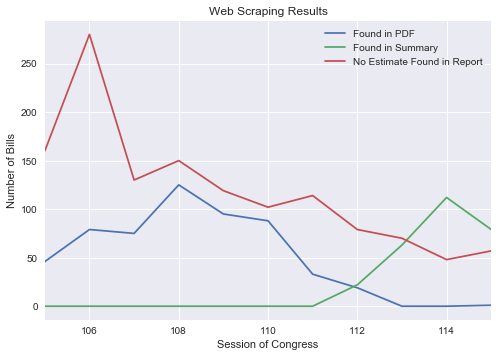

In [60]:
#Plot webscraping results
descrip_df.plot(y=["Found in PDF", "Found in Summary", "No Estimate Found in Report"])
plt.xlabel("Session of Congress")
plt.ylabel("Number of Bills")
plt.title("Web Scraping Results")
plt.show()

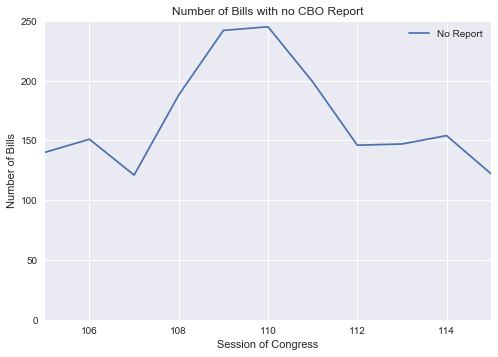

In [63]:
#Plot only no report
descrip_df.plot(y=["No Report"])
plt.xlabel("Session of Congress")
plt.ylabel("Number of Bills")
plt.ylim(0, 250)
plt.title("Number of Bills with no CBO Report")
plt.show()

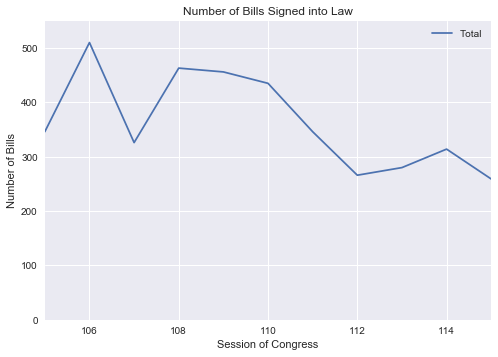

In [72]:
#Plot total number of bills per year
descrip_df["Total"] = descrip_df["No Report"] + descrip_df["Found in PDF"] + descrip_df["Found in Summary"] + descrip_df["No Estimate Found in Report"]
descrip_df.plot(y=["Total"])
plt.xlabel("Session of Congress")
plt.ylabel("Number of Bills")
plt.ylim(0, 550)
plt.title("Number of Bills Signed into Law")
plt.show()

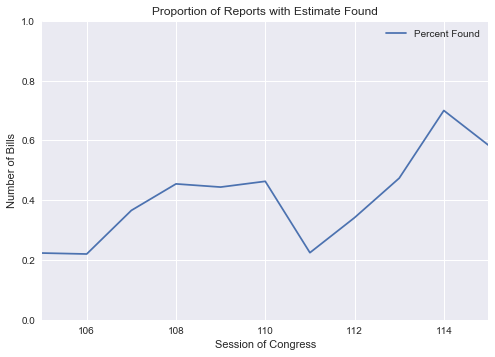

In [73]:
#Plot percent of estimates found from bills with reports
descrip_df["Percent Found"] = (descrip_df["Found in PDF"] + descrip_df["Found in Summary"]) / (descrip_df["Total"] - descrip_df["No Report"])
descrip_df.plot(y=["Percent Found"])
plt.xlabel("Session of Congress")
plt.ylabel("Number of Bills")
plt.ylim(0, 1)
plt.title("Proportion of Reports with Estimate Found")
plt.show()

In [157]:
#Prettify Column labels for use in graphs
df = pd.read_csv("scores_data.csv")
df["FRI"] = df["Score"]
df["Position"].replace("Rep", "Representative", inplace=True)
df["Position"].replace("Sen", "Senator", inplace=True)
df["Party"].replace("R", "Republican", inplace=True)
df["Party"].replace("I", "Independent", inplace=True)
df["Party"].replace("D", "Democrat", inplace=True)

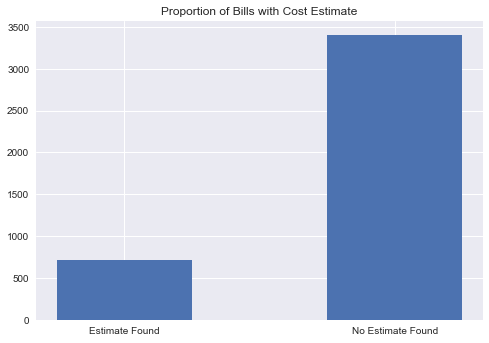

In [158]:
#Graph relative number of bills with cost estimates
num_bills = 4112
num_nonzero = 710
plt.bar(["Estimate Found","No Estimate Found"], [num_nonzero,num_bills - num_nonzero], .5)
plt.title("Proportion of Bills with Cost Estimate")
plt.show()

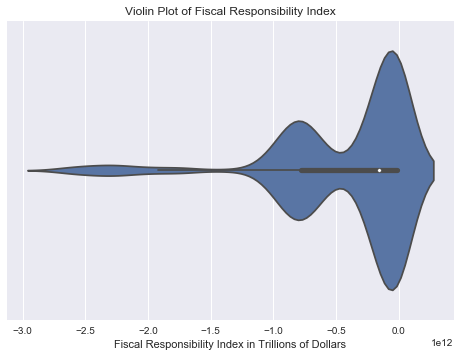

In [159]:
#Plot distribution of the FRI
sns.violinplot(x=df["FRI"])
plt.title("Violin Plot of Fiscal Responsibility Index")
plt.xlabel("Fiscal Responsibility Index in Trillions of Dollars")
plt.show()

In [163]:
#Import regions data for use in regression
regions_df = pd.read_csv("regions.csv")
regions_df.head(n=10)

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [164]:
#merge regions data with FRI data
df = df.merge(regions_df[["State Code", "Region", "Division"]], left_on="State", right_on="State Code")

In [165]:
#Save the merged data
df.to_csv("scores_w_regions")

In [166]:
df.head()

,Name,Party,Position,Score,State,Tenure,YOB,FRI,Avg_score,State Code,Region,Division
0,"Abercrombie, Neil",Democrat,Representative,-6.973005e+11,HI,7,1938,-6.973005e+11,-9.961436e+10,HI,West,Pacific
1,"Mink, Patsy Takemoto",Democrat,Representative,-4.903900e+10,HI,3,1927,-4.903900e+10,-1.634633e+10,HI,West,Pacific
2,"Case, Ed",Democrat,Representative,-6.337500e+11,HI,3,1952,-6.337500e+11,-2.112500e+11,HI,West,Pacific
3,"Hirono, Mazie",Democrat,Representative,-4.689300e+10,HI,3,1947,-4.689300e+10,-1.563100e+10,HI,West,Pacific
4,"Djou, Charles",Republican,Representative,-3.000000e+07,HI,1,1970,-3.000000e+07,-3.000000e+07,HI,West,Pacific


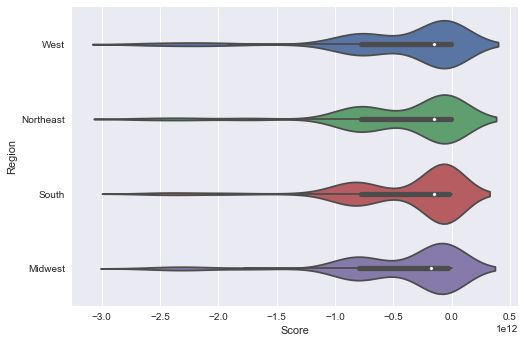

In [216]:
sns.violinplot(x="Score", y="Region", data=df, orient='h')
plt.show()

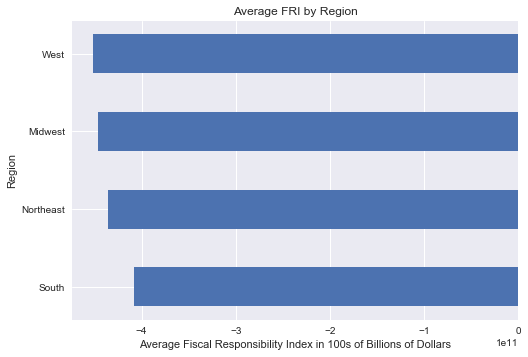

In [170]:
#Plot average FRI by region
regions = np.array(list(set(df["Region"])))
means = np.array([df[df["Region"] == region]["Score"].mean() for region in regions])
mask = means.argsort()
positions = np.arange(len(regions))
plt.barh(positions, means[mask][::-1], height=.5, align="center")
plt.yticks(positions, regions[mask][::-1])
plt.xlabel("Average Fiscal Responsibility Index in 100s of Billions of Dollars")
plt.ylabel("Region")
plt.title("Average FRI by Region")
plt.show()



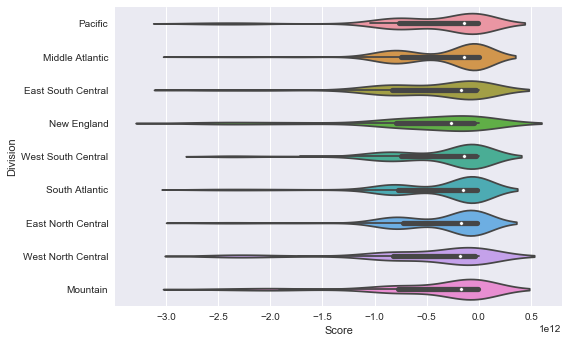

In [171]:
#Make violin plots by division
sns.violinplot(x="Score", y="Division", data=df, orient='h')
plt.show()

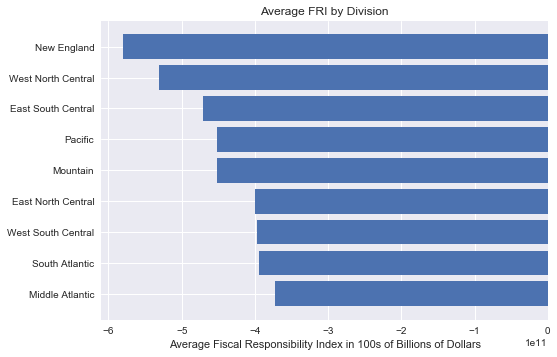

In [173]:
#Plot average FRI by division
divisions = np.array(list(set(df["Division"])))
means = np.array([df[df["Division"] == division]["Score"].mean() for division in divisions])
mask = means.argsort()
positions = np.arange(len(divisions))
plt.barh(positions, means[mask][::-1], align="center")
plt.yticks(positions, divisions[mask][::-1])
plt.xlabel("Average Fiscal Responsibility Index in 100s of Billions of Dollars")
plt.title("Average FRI by Division")
plt.show()


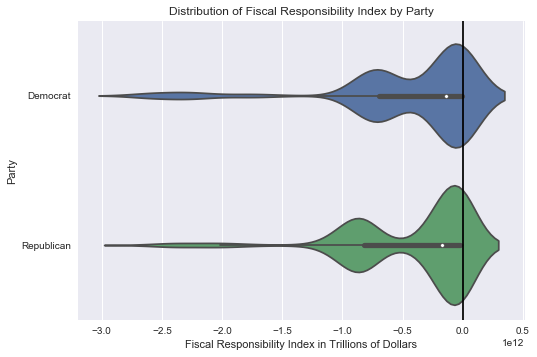

In [205]:
#Show distribution of FRI by Party
sns.violinplot(x="Score", y="Party", data=df[df["Party"]!="Independent"], orient='h')
plt.axvline(0, color='black')
plt.xlabel("Fiscal Responsibility Index in Trillions of Dollars")
plt.title("Distribution of Fiscal Responsibility Index by Party")
plt.show()

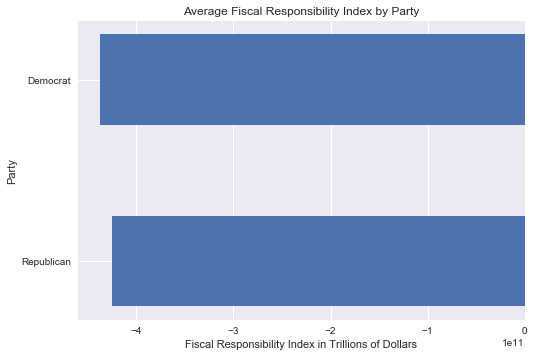

In [203]:
#Plot average FRI by Party
parties = np.array(["Republican", "Democrat"])
means = np.array([df[(df["Party"] == party)]["Score"].mean() for party in parties])
mask = means.argsort()
positions = np.arange(len(parties))
plt.barh(positions, means[mask][::-1], height = .5, align="center")
plt.yticks(positions, parties[mask][::-1])
plt.xlabel("Fiscal Responsibility Index in Trillions of Dollars")
plt.title("Average Fiscal Responsibility Index by Party")
plt.ylabel("Party")
plt.show()

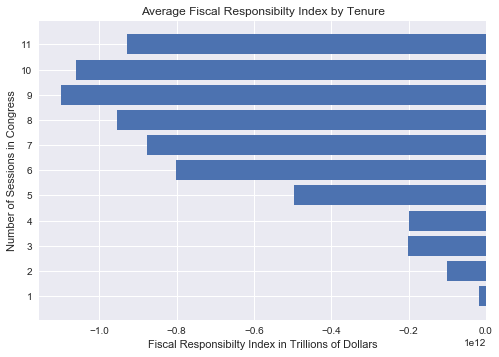

In [149]:
#Plot average FRI by tenure
tenures = np.array(list(set(df["Tenure"])))
means = np.array([df[df["Tenure"] == tenure]["Score"].mean() for tenure in tenures])
positions = np.arange(len(tenures))
plt.barh(positions, means, align="center")
plt.yticks(positions, tenures)
plt.xlabel("Fiscal Responsibilty Index in Trillions of Dollars")
plt.title("Average Fiscal Responsibilty Index by Tenure")
plt.ylabel("Number of Sessions in Congress")
plt.show()

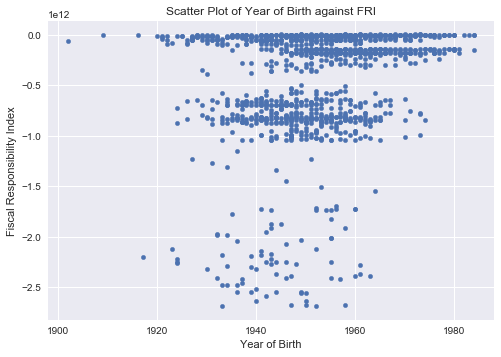

In [180]:
#Make a scatter plot for year of birth and FRI
df.plot(kind="scatter", x="YOB", y="Score")
plt.xlabel("Year of Birth")
plt.ylabel("Fiscal Responsibility Index")
plt.title("Scatter Plot of Year of Birth against FRI")
plt.show()

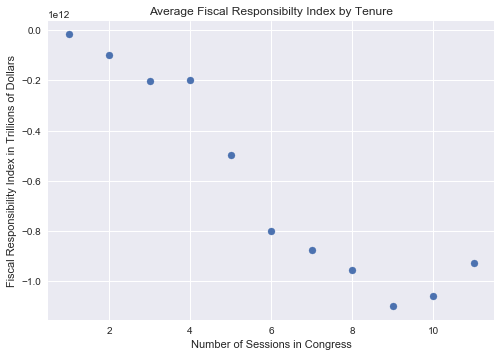

In [187]:
#Make a scatter plot for FRI and tenure
tenures = np.array(list(set(df["Tenure"])))
means = np.array([df[df["Tenure"] == tenure]["Score"].mean() for tenure in tenures])
plt.scatter(tenures, means)
plt.title("Average Fiscal Responsibilty Index by Tenure")
#plt.ylim(-4e11, .5e11)
plt.ylabel("Fiscal Responsibility Index in Trillions of Dollars")
plt.xlabel("Number of Sessions in Congress")
plt.show()

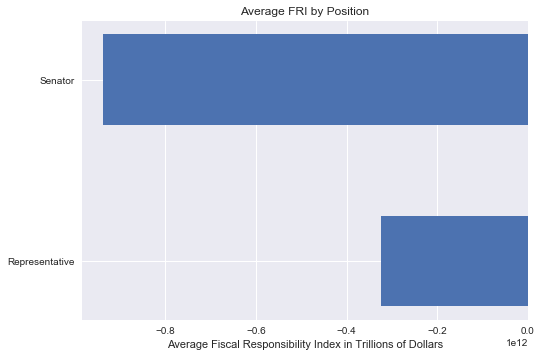

In [215]:
#Plot average FRI by Position
pos = np.array(list(set(df["Position"])))
means = np.array([df[df["Position"] == i]["Score"].mean() for i in pos])
mask = means.argsort()
positions = np.arange(len(pos))
plt.barh(positions, means[mask][::-1], height=.5,align="center")
plt.yticks(positions, pos[mask][::-1])
plt.xlabel("Average Fiscal Responsibility Index in Trillions of Dollars")
plt.title("Average FRI by Position")
plt.show()



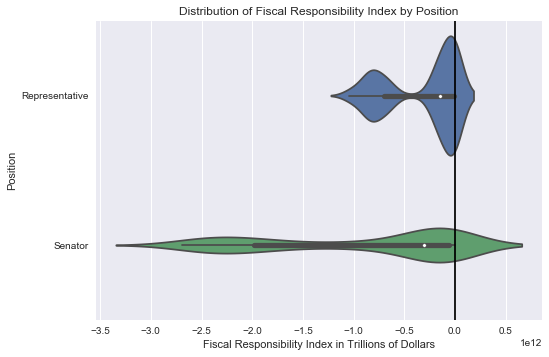

In [182]:
#Show distribution of FRI by Position
sns.violinplot(x="Score", y="Position", data=df, orient='h')
plt.axvline(0, color='black')
plt.title("Distribution of Fiscal Responsibility Index by Position")
plt.xlabel("Fiscal Responsibility Index in Trillions of Dollars")
plt.show()

In [154]:
#Show the 10 with highest FRI
df.nlargest(10, "Score")

,Name,Party,Position,Score,State,Tenure,YOB,FRI,Avg_score,State Code,Region,Division
140,"Payne, Donald, Jr.",D,Representative,4.481000e+09,NJ,4,1958,4.481000e+09,1.120250e+09,NJ,Northeast,Middle Atlantic
584,"Ruiz, Raul",D,Representative,4.471500e+09,CA,3,1972,4.471500e+09,1.490500e+09,CA,West,Pacific
5,"Hanabusa, Colleen",D,Representative,4.200000e+09,HI,4,1951,4.200000e+09,1.050000e+09,HI,West,Pacific
203,"Gallego, Pete P.",D,Representative,4.200000e+09,TX,1,1961,4.200000e+09,4.200000e+09,TX,South,West South Central
677,"Garcia, Joe",D,Representative,4.200000e+09,FL,1,1963,4.200000e+09,4.200000e+09,FL,South,South Atlantic
741,"Enyart, Bill",D,Representative,4.200000e+09,IL,1,1949,4.200000e+09,4.200000e+09,IL,Midwest,East North Central
1141,"Horsford, Steven",D,Representative,4.200000e+09,NV,1,1973,4.200000e+09,4.200000e+09,NV,West,Mountain
1190,"Barber, Ron",D,Representative,4.200000e+09,AZ,2,1945,4.200000e+09,2.100000e+09,AZ,West,Mountain
743,"Schneider, Brad",D,Representative,4.196500e+09,IL,2,1961,4.196500e+09,2.098250e+09,IL,Midwest,East North Central
68,"Grimm, Michael G.",R,Representative,4.189000e+09,NY,2,1970,4.189000e+09,2.094500e+09,NY,Northeast,Middle Atlantic


In [31]:
#Show the 10 with lowest FRI
df.nsmallest(10, "Score")

,Name,Party,Position,Score,State,Tenure,YOB,Avg_score,State Code,Region,Division
118,"Collins, Susan Margaret",R,Sen,-2.690311e+12,ME,11,1952,-2.445737e+11,ME,Northeast,New England
602,"Feinstein, Dianne",D,Sen,-2.686509e+12,CA,11,1933,-2.442280e+11,CA,West,Pacific
89,"Schumer, Charles Ellis (Chuck)",D,Sen,-2.681626e+12,NY,10,1950,-2.681626e+11,NY,Northeast,Middle Atlantic
984,"Carper, Thomas Richard",D,Sen,-2.675962e+12,DE,9,1947,-2.973291e+11,DE,South,South Atlantic
1132,"Cantwell, Maria E.",D,Sen,-2.675858e+12,WA,9,1958,-2.973176e+11,WA,West,Pacific
344,"Stabenow, Deborah Ann",D,Sen,-2.642617e+12,MI,9,1950,-2.936241e+11,MI,Midwest,East North Central
933,"Alexander, Lamar",R,Sen,-2.635948e+12,TN,8,1940,-3.294934e+11,TN,South,East South Central
695,"Nelson, Clarence William (Bill)",D,Sen,-2.584699e+12,FL,9,1942,-2.871887e+11,FL,South,South Atlantic
1131,"Murray, Patty",D,Sen,-2.556582e+12,WA,11,1950,-2.324165e+11,WA,West,Pacific
764,"Wyden, Ronald Lee",D,Sen,-2.555171e+12,OR,11,1949,-2.322882e+11,OR,West,Pacific


In [34]:
#How many have negative scores?
print(100*(1 - len(df[df["Score"]>0]) / len(df)), "% have negative scores.", sep='')

98.544061302682% have negative scores.


In [190]:
#Create a more simplified dataset
new_df = df[["Name", "Party", "Position", "State", "FRI"]]
new_df.to_csv("fri.csv")